In [1]:
import dask.dataframe as dd
import pandas as pd

def sloc_percent(row):
    row['sloc_percent'] = 100*(row.git_diff_src_churn.astype('float')/row.gh_sloc.astype('float'))
    return row

#df = dd.read_csv('data/travistorrent_11_1_2017.csv',blocksize=25000000,usecols=['tr_build_id','gh_project_name','git_num_all_built_commits','gh_is_pr','git_trigger_commit','gh_sloc','git_diff_src_churn','gh_diff_files_added','gh_diff_files_deleted','gh_diff_files_modified'])
df = dd.read_csv('data/travistorrent_11_1_2017.csv',blocksize=25000000,usecols=['tr_build_id','gh_project_name','git_num_all_built_commits','git_trigger_commit','gh_sloc','git_diff_src_churn'])
pdf = df.drop_duplicates().map_partitions(sloc_percent).compute()

In [2]:
pdf.sort_values('sloc_percent',inplace=True,ascending=True)
pdf.head(20)

,tr_build_id,gh_project_name,git_num_all_built_commits,git_trigger_commit,git_diff_src_churn,gh_sloc,sloc_percent
38117,3551393,thoughtbot/factory_girl_rails,1,f2b5b79dd9a5d0599108fc637e943dd76d09cb92,0,84,0.0
10918,5101439,ging/social_stream,1,0d11fb3e209865dd1fc8b26dc70d41691315f12c,0,8199,0.0
10915,5101389,opal/opal,1,7daab71a56cba093c367b7d7997528b0d2e3cc0f,0,10393,0.0
10912,5101348,opal/opal,1,b3e04476a0676e5a15eef897af2f777e4625f67e,0,10393,0.0
10909,5101299,opal/opal,1,272f2a04271bbba8369a6a5af0025dec9708df94,0,10393,0.0
10906,5101142,opal/opal,2,1e16268efd863d283bff3fd5cc7704c859b847bd,0,10393,0.0
27693,83821251,neo4jrb/neo4j-core,1,b35a2736f957b16f9e2a663771b5214d39427abc,0,3722,0.0
27703,83821525,neo4jrb/neo4j-core,1,7eeb94559ebde96d954a95160bc176a79d40b7b7,0,3722,0.0
27713,83822268,neo4jrb/neo4j-core,1,472263aeec0a1a0b3ac69f23b19a06dff75330d5,0,3722,0.0
10870,5100545,RubyMoney/money,1,65c323a742648058d7552365cbae6134bbf47002,0,957,0.0


In [3]:
pdfrange = pdf[(pdf.sloc_percent > 0.0) & (pdf.sloc_percent < 10)]
pdfrange.head(20)

,tr_build_id,gh_project_name,git_num_all_built_commits,git_trigger_commit,git_diff_src_churn,gh_sloc,sloc_percent
12213,153438513,aws/aws-sdk-java,1,cd1db75741e3bf84c0c763074ce0a9944f552376,1,1370771,0.000073
20056,106592801,aws/aws-sdk-java,1,bc261b8e5979bcaf512f798d39f5432e5833f9b8,1,1041202,0.000096
19586,5785389,rapid7/metasploit-framework,1,0d56da0511e934f3922e9f058e4d78f68afd79d7,1,872188,0.000115
7563,5058736,rapid7/metasploit-framework,1,01589190312f89bcf13ea676ed96deafe750a242,1,865757,0.000116
7464,5057268,rapid7/metasploit-framework,1,cbce1bdff28a70cb9b84c6d4e51ac39c3249fc9d,1,865676,0.000116
2253,4482111,rapid7/metasploit-framework,1,a68ad8f600a0a80a7143a32094430697548bdad2,1,860438,0.000116
2199,4481286,rapid7/metasploit-framework,1,09fd224763c507a59e0935f9cf240bec3b2c8464,1,860272,0.000116
2203,4481329,rapid7/metasploit-framework,1,ec0db66fcb829143cc665211597d7dc7503a6048,1,860271,0.000116
21458,3887664,rapid7/metasploit-framework,1,7cb42a5eb4f7fec31d10b5cd32ee5e39f1f4400d,1,856444,0.000117
21353,3884473,rapid7/metasploit-framework,1,cc52e2c5338521eb3a141e1338376ed8834e6268,1,856443,0.000117


Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efbfe07fa20>]], dtype=object)

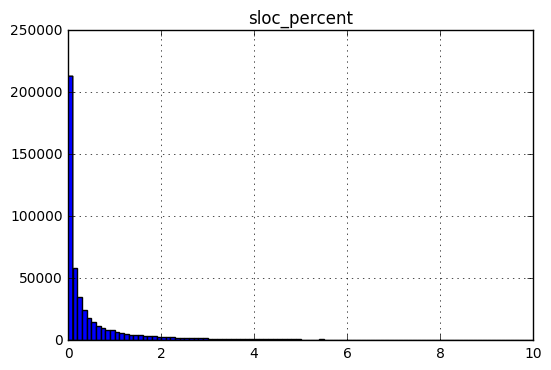

In [4]:
%pylab inline
pdfrange.hist(column='sloc_percent',bins=100)